## Introduction

This tutorial is primarily focussed to introduce you to "Natural Language Processing (NLP)". Natural language, i.e. language used by humans for daily communications (like Japanese, English, German, etc.), have evolved over the years and NLP is an attempt for computers to fully understand human language. From analysing parts of sentences based on word frquencies and identifying common writing styles, to an extent where the computer can give an appropriate response to a person, NLP aims to improve computer's understanding of human speech.

This tutorial is designed and created on Python 2.7 using [Natural Language Toolkit (NLTK)](http://www.nltk.org/). For working in computational linguistics using Python, NLTK is an amazing library to play with natural language.

### Tutorial content

In this tutorial, we will be covering Language Processing tasks using the functionalites provided by the NTK modules

We plan to cover the following topics in this tutorial:
- [Installing the libraries](#Installing-the-libraries)
- [Language Processing](#Language-Processing)
- [Accessing Text Corpora and Lexical Resources](#Accessing-Text-Corpora-and-Lexical-Resources)
- [Processing Raw Text](#Processing-Raw-Text)
- [Categorizing and Tagging Words](#Categorizing-and-Tagging-Words)

## Installing the libraries

Before getting started, you'll need to install the following libraries: Numpy, Matplotlib and NLTK. You can install using pip command as follows:

    $ pip install -U numpy nltk Matplotlib

We will be using the data from the NLTK Book collection for the examples in the below tutorial.

In [1]:
import nltk
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


## Language Processing

Access the examples by entering their names:

In [2]:
text1

<Text: Moby Dick by Herman Melville 1851>

Check the NLTK text type:

In [3]:
type(text1)

nltk.text.Text

Access the contents in the sample NLTK text:

In [4]:
print text1[:20]
print (' '.join(str(text1[idx]) for idx, words in enumerate(text1[:42])))

[u'[', u'Moby', u'Dick', u'by', u'Herman', u'Melville', u'1851', u']', u'ETYMOLOGY', u'.', u'(', u'Supplied', u'by', u'a', u'Late', u'Consumptive', u'Usher', u'to', u'a', u'Grammar']
[ Moby Dick by Herman Melville 1851 ] ETYMOLOGY . ( Supplied by a Late Consumptive Usher to a Grammar School ) The pale Usher -- threadbare in coat , heart , body , and brain ; I see him now .


### Searching Text

We first examine the context of a language, and instead of simply reading the text, we can use the concordance view to get the occurance of a given word along woth some context:

In [5]:
text1.concordance("pictures")

Displaying 16 of 16 matches:
nting , and the meaning of the few pictures that were in it . Thus I soon enga
spotted tawn -- living , breathing pictures painted by the sun . The Pagan leo
altering silence aft ! Methinks it pictures life . Foremost through the sparkl
ey .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere long paint
t in this matter , by proving such pictures of the whale all wrong . It may be
evailed , not only in most popular pictures of the whale , but in many scienti
 attempts , let us glance at those pictures of leviathan purporting to be sobe
d whale book , wherein are several pictures of the different species of the Le
. CHAPTER 56 Of the Less Erroneous Pictures of Whales , and the True Pictures 
 Pictures of Whales , and the True Pictures of Whaling Scenes . In connexion w
 . In connexion with the monstrous pictures of whales , I am strongly tempted 
the Right Whale , the best outline pictures are in Scoresby ; but they are dra
deficiency , because it

Further, using the dispersion_plot attribute you can see the location of a word and the frequency of its occurrences in the below plot.

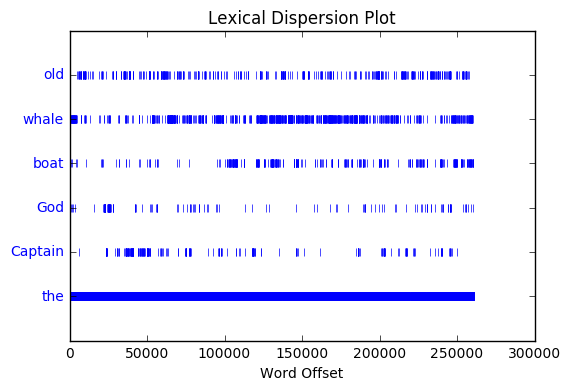

In [6]:
text1.dispersion_plot(["old", "whale", "boat", "God", "Captain", 'the'])

From the above plot, it is clearly evident how frequently "the" word occurs in the text.

### Counting Vocabulary

A good term to identify here is the lexical diversity of given text. 
We use the lexical_diversity function to calculate on an average how many times each word is used in a text:

In [7]:
def lexical_diversity(text):
    
    #calculate the length of text
    len_text = len(text) 
    
    #calculate unique words in text
    vocab_text = len(set(text))
    
    return len_text / float(vocab_text)

In [8]:
lexical_diversity(text1)

13.502044830977896

Similarly, the percentage function gets the count of a word as a percentage of total number of words in the text:

In [9]:
def percentage(word, text):
    
    #calculate the count of word in text
    word_count = text.count(word) 
    
    #calculate the length of text
    len_text = len(text) 
    
    return 100 * word_count / float(len_text)

In [10]:
percentage('whale', text1)

0.3473673313677301

### Computing with Language: Simple Statistics

NLTK provides a built-in feature "FreqDist(text)" to calculate the Frequency distribution of each vocabulary in the text.

Calculate the Frequency distribution of text1:

In [11]:
freq_dist_1 = FreqDist(text1)

Check the frequency of a particular vocabulary in text1: (Example: 'the')

In [12]:
freq_dist_1['the'] 

13721

Attribute: items() - returns the sample with its count in the text:

In [13]:
vocab = freq_dist_1.items() 
print vocab[0:15]

[(u'funereal', 1), (u'unscientific', 1), (u'divinely', 2), (u'foul', 11), (u'four', 74), (u'gag', 2), (u'prefix', 1), (u'woods', 9), (u'clotted', 2), (u'Duck', 2), (u'hanging', 19), (u'plaudits', 1), (u'woody', 1), (u'Until', 2), (u'marching', 6)]


Attribute: N() - returns the total number of samples in the text i.e. length of text:

In [14]:
freq_dist_1.N() 

260819

Attribute: max - returns the vocabulary with their total counts in the given text:

In [15]:
freq_dist_1.max 

<bound method FreqDist.max of FreqDist({u',': 18713, u'the': 13721, u'.': 6862, u'of': 6536, u'and': 6024, u'a': 4569, u'to': 4542, u';': 4072, u'in': 3916, u'that': 2982, ...})>

We can also generate a Frequency Distribution plot. Following is a cumulative plot that shows 40 most frequently occuring words in text1:

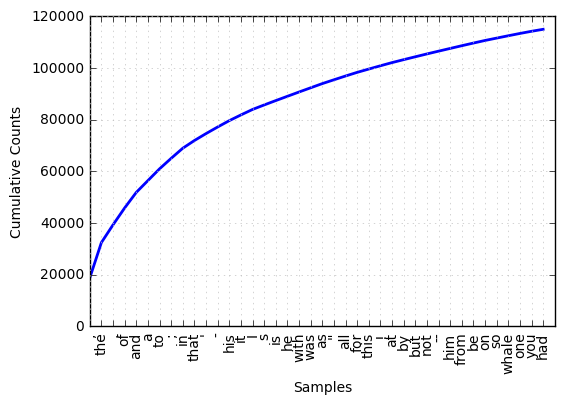

In [16]:
freq_dist_1.plot(40, cumulative=True)

### Collocations

A collocation in NLTK is just a bigram that occurs frequently in the text and is calculated based on the frequency of individual words. The result of a collocation involves all the bigrams that occur frequently but involve rare words. 

In [17]:
text1.collocations()

Sperm Whale; Moby Dick; White Whale; old man; Captain Ahab; sperm
whale; Right Whale; Captain Peleg; New Bedford; Cape Horn; cried Ahab;
years ago; lower jaw; never mind; Father Mapple; cried Stubb; chief
mate; white whale; ivory leg; one hand


## Accessing Text Corpora and Lexical Resources

A text corpora is just a large body of text and NLTK package provides a list of corpus that we can use. In particular, we will be importing the Brown Corpus from NLTK and using it.

### Accessing Text Corpora

In [18]:
from nltk.corpus import brown

Check the NLTK corpora type:

In [19]:
type(brown) 

nltk.corpus.util.LazyCorpusLoader

Attribute: words() - returns a list of words in the corpus:

In [20]:
brown.words() 

[u'The', u'Fulton', u'County', u'Grand', u'Jury', ...]

Attribute: sents() - returns a list of sentences where each sentence itself is a list of words:

In [21]:
[' '.join(str(word) for word in brown.sents()[0])]

["The Fulton County Grand Jury said Friday an investigation of Atlanta's recent primary election produced `` no evidence '' that any irregularities took place ."]

Since the sources have been categorized by the Genre, we can find all the categories available:
    
Attribute: categories() 

In [22]:
print brown.categories() 

[u'adventure', u'belles_lettres', u'editorial', u'fiction', u'government', u'hobbies', u'humor', u'learned', u'lore', u'mystery', u'news', u'religion', u'reviews', u'romance', u'science_fiction']


We can further specify the categories of corpus to read using the following commands:

In [23]:
print brown.words(categories='romance')[:20]

[u'They', u'neither', u'liked', u'nor', u'disliked', u'the', u'Old', u'Man', u'.', u'To', u'them', u'he', u'could', u'have', u'been', u'the', u'broken', u'bell', u'in', u'the']


In [24]:
[' '.join(str(word) for word in brown.sents(categories='romance')[0])]

['They neither liked nor disliked the Old Man .']

### NLTK's Frequency Distribution

We can calculate the count of words using NLTK's Freq Distribution. 

In [25]:
"""
    Source: #2.1 (http://www.nltk.org/book_1ed/ch02.html)
"""

humor_text = brown.words(categories='humor')
humor_freqDist = nltk.FreqDist([w for w in humor_text])
samples = ['can', 'could', 'may', 'might', 'must', 'will']

for s in samples:
    print(s + ': %s' % humor_freqDist[s])

can: 16
could: 30
may: 8
might: 8
must: 9
will: 13


We can further calculate the count of words based on different categories using NLTK's Conditional Freq Distribution and plot the counts of each sample for different categories. 

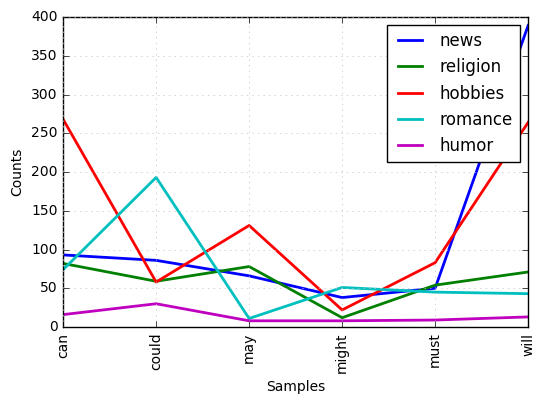

In [26]:
"""
    Source: #2.1 (http://www.nltk.org/book_1ed/ch02.html)
"""

cfd = nltk.ConditionalFreqDist((genre, word)\
           for genre in brown.categories()\
           for word in brown.words(categories=genre))
genres = ['news', 'religion', 'hobbies', 'romance', 'humor']
samples = ['can', 'could', 'may', 'might', 'must', 'will']
cfd.plot(conditions=genres, samples=samples)

### Using Language Processing

It is important to understand and distinguish between the data types used here.

To use the attributes of NLTK text, we first need to convert the corpus into type NLTK.text and then we can apply its functions.

In [27]:
romance_text = nltk.Text(brown.words(categories='romance'))

Using attributs of NLTK text as described earlier:

In [28]:
romance_text.concordance('may')

Displaying 11 of 11 matches:
n uniform has to do is to get by . He may not rise to the heights , but he can 
shed but that in the meanwhile , they may run loose and are expected to perform
r we are too uncertain of where trust may be placed '' . And when he was alone 
d respectful . He said , `` Captain , may I speak , please ? ? Captain , I am i
ch can make it '' . He said , `` That may be , but it isn't authentic the way r
ay because he was so nearsighted . It may have been true for all I know , becau
tmosphere , an atmosphere in which he may absorb the ideas of other masters , a
 Edythe to come home to . Though that may be unfair since Ben Cooper , John's f
yond caring what she said . `` Things may smooth over yet '' , Chris said , his
ines you will write me about them . I may settle on some makeshift arrangements
 you're so anxious to get a tan , you may not want to use it '' . `` I'm not th


In [29]:
print lexical_diversity(romance_text)

8.28466635116


In [30]:
print percentage('could', romance_text)

0.275627659878


### Lexical Resources

 Lexical resouce is a collection of words/phrases along with some information that is associated with it.

For instance, if vocab = set(text1) then vocab is a simple lexical resource. To put simply, a list of sorted words is another simplest leical resource.

### Wordlist Corpora

NLTK contains corpora of lists of words that can be used to find an unusual or most commonly occuring words. 
For instance, there is a corpus of stopwords i.e. frequently occuring words like 'the', 'of', 'a', etc and we usually want to filter these out before processing the document. 

In [31]:
from nltk.corpus import stopwords 

Stopwords are available in different languages:

In [32]:
print stopwords.words('english')[:15]

[u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', u'ourselves', u'you', u'your', u'yours', u'yourself', u'yourselves', u'he', u'him']


In [33]:
print stopwords.words('german')[:15]

[u'aber', u'alle', u'allem', u'allen', u'aller', u'alles', u'als', u'also', u'am', u'an', u'ander', u'andere', u'anderem', u'anderen', u'anderer']


Here's a simple function that compares the input text with the NLTK's dictionary and returns a list of words that are unusual:

In [34]:
def unusual_words(text):
    """
    Source: #2.4 (http://www.nltk.org/book_1ed/ch02.html)
    """
    text_vocab = set(w.lower() for w in text)
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    unusual = text_vocab.difference(english_vocab)
    return (unusual)

In [35]:
unusual_words(['Hi','my','naame','is','Andrew','Carnegie','Mellon','!!!!','My','E-mail','id', 'is','carnegie@andrew.cmu.edu'])

{'!!!!', 'carnegie@andrew.cmu.edu', 'e-mail', 'naame'}

## Processing Raw Text

While it's conveniet to use existing collections of text corpora as seen above, the most common source of texts is undoubtedly the Web. And such texts need some form of processing.

Using a sample of texts from Project Gutenberg that is available in the NLTK corpus collection, we will focus on concepts like tokenization, stemming and lemmatization functionality offered by NLTK library:

In [36]:
from urllib import urlopen

url = "http://www.gutenberg.org/files/2554/2554.txt"
raw = urlopen(url).read()

print type(raw)
print len(raw)
print raw[:75]

<type 'str'>
1176896
The Project Gutenberg EBook of Crime and Punishment, by Fyodor Dostoevsky



The raw content includes details like whitespaces, punctuations, line breaks, etc. that we are not interested in. Thus, for language processing, we break the strings into a list of words and punctuations. This process is called tokenization.

In [37]:
tokens = nltk.word_tokenize(raw)

print type(tokens)
print len(tokens)
print tokens[:10]

<type 'list'>
254352
['The', 'Project', 'Gutenberg', 'EBook', 'of', 'Crime', 'and', 'Punishment', ',', 'by']


The next step is to create the NLTK text from this list to enable us to carry out all of the NLTK linguistic processing as explained earlier:

In [38]:
text = nltk.Text(tokens)

print type(text)
print ' '
print text[1020:1060]
print ' '
print text.collocations()

<class 'nltk.text.Text'>
 
['AND', 'PUNISHMENT', 'PART', 'I', 'CHAPTER', 'I', 'On', 'an', 'exceptionally', 'hot', 'evening', 'early', 'in', 'July', 'a', 'young', 'man', 'came', 'out', 'of', 'the', 'garret', 'in', 'which', 'he', 'lodged', 'in', 'S.', 'Place', 'and', 'walked', 'slowly', ',', 'as', 'though', 'in', 'hesitation', ',', 'towards', 'K.']
 
Katerina Ivanovna; Pyotr Petrovitch; Pulcheria Alexandrovna; Avdotya
Romanovna; Rodion Romanovitch; Marfa Petrovna; Sofya Semyonovna; old
woman; Project Gutenberg-tm; Porfiry Petrovitch; Amalia Ivanovna;
great deal; Nikodim Fomitch; young man; Ilya Petrovitch; n't know;
Project Gutenberg; Dmitri Prokofitch; Andrey Semyonovitch; Hay Market
None


### Normalizing Text

We often normalize the text by converting texts to lower case and thereby ignoring the distinction between "The" and "the". To further normalize the text, we strip off any affixes. This process is known as stemming.

Stemming is not a well-defined process, and we typically pick the stemmer that best suits the application we have in mind. Typically, NLTK provides us with a couple of stemmers. For instance, Porter and Lancaster stemmers. Each stemmer follows its own rules for stripping affixes and thus will often return different results.

In [39]:
print tokens[265:300]

['successful', 'career', 'seemed', 'to', 'open', 'before', 'him', ',', 'but', 'those', 'hopes', 'were', 'soon', 'dashed', '.', 'In', '1849', 'he', 'was', 'arrested', '.', 'Though', 'neither', 'by', 'temperament', 'nor', 'conviction', 'a', 'revolutionist', ',', 'Dostoevsky', 'was', 'one', 'of', 'a']


Porter Stemmer:

In [40]:
porter = nltk.PorterStemmer()
print [str(porter.stem(t)) for t in tokens[265:300]]

['success', 'career', 'seem', 'to', 'open', 'befor', 'him', ',', 'but', 'those', 'hope', 'were', 'soon', 'dash', '.', 'In', '1849', 'he', 'wa', 'arrest', '.', 'Though', 'neither', 'by', 'tempera', 'nor', 'convict', 'a', 'revolutionist', ',', 'Dostoevski', 'wa', 'one', 'of', 'a']


Lancaster Stemmer:

In [41]:
lancaster = nltk.LancasterStemmer()
print [str(lancaster.stem(t)) for t in tokens[265:300]]

['success', 'car', 'seem', 'to', 'op', 'bef', 'him', ',', 'but', 'thos', 'hop', 'wer', 'soon', 'dash', '.', 'in', '1849', 'he', 'was', 'arrest', '.', 'though', 'neith', 'by', 'tempera', 'nor', 'convict', 'a', 'revolv', ',', 'dostoevsky', 'was', 'on', 'of', 'a']


The next step is to make sure that the resulting form is a known word in a dictionary. This process is known as lemmatization.

The WordNet lemmatizer only removes affixes if the resulting word is in its dictionary. This additional checking process makes the lemmatizer slower than the above stemmers.

In [42]:
lemmatizer = nltk.WordNetLemmatizer()
print [str(lemmatizer.lemmatize(t)) for t in tokens[265:300]]

['successful', 'career', 'seemed', 'to', 'open', 'before', 'him', ',', 'but', 'those', 'hope', 'were', 'soon', 'dashed', '.', 'In', '1849', 'he', 'wa', 'arrested', '.', 'Though', 'neither', 'by', 'temperament', 'nor', 'conviction', 'a', 'revolutionist', ',', 'Dostoevsky', 'wa', 'one', 'of', 'a']


Note: Apart from the functions described above, Regular expressions can be widely used to create functions that will allow us to have more control over how we want to process/normalise texts (e.g. split the words, remove punctuations, remove non-string values and so on).

# Categorizing and Tagging Words

Back in elementary school we learnt the word classed such as nouns, verbs, adjectives, and adverbs. These "word classes" are useful categories for many language processing tasks. Our goal here is to understand how they are used in Natural Language Processing.

The process of classifying words into their parts of speech and labeling them accordingly is known as part-of-speech tagging (POS-tagging) or simply tagging. The collection of tags used for a particular task is known as a tagset. Our emphasis in this module is on understanding tags, and tagging text automatically.

### Using a Tagger

 Attribute: POS_tag: returns (word, tag) by processing a sequence of words, and attaching a part of speech tag to each word 

In [43]:
text = nltk.word_tokenize("They refuse to permit us to obtain the refuse permit")
nltk.pos_tag(text)

[('They', 'PRP'),
 ('refuse', 'VBP'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

You can use the following commands to understand the meaning of the tags:

In [44]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [45]:
nltk.help.upenn_tagset('NN')

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...


Let's look at another example, this time including some homonyms:

In [46]:
text = nltk.word_tokenize("They refuse to permit us to obtain the refuse permit")
nltk.pos_tag(text)

[('They', 'PRP'),
 ('refuse', 'VBP'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

Notice that refuse and permit both appear as a present tense verb (VBP) and a noun (NN). The use of words in different parts of speech refer to a different meaning and thus, we need to know which word is being used in order to pronounce the text correctly. (For this reason, text-to-speech systems usually perform POS-tagging.)

### Automatic Word Tagging

We see that the tag of a word depends on the word and its context within a sentence. For this reason, we will be working with data at the level of (tagged) sentences rather than words. Let's begin by loading the data we will be using.

The brown corpus from NLTK package has already been tagged for its part-of-speech. Since the corpus is also segmented into sentences, it has a tagged_sents() method that divides up the tagged words into sentences rather than presenting them as one big list.

In [47]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')

Example of 1st sentence in brown_tagged_sents:

In [48]:
brown_tagged_sents[0]

[(u'The', u'AT'),
 (u'Fulton', u'NP-TL'),
 (u'County', u'NN-TL'),
 (u'Grand', u'JJ-TL'),
 (u'Jury', u'NN-TL'),
 (u'said', u'VBD'),
 (u'Friday', u'NR'),
 (u'an', u'AT'),
 (u'investigation', u'NN'),
 (u'of', u'IN'),
 (u"Atlanta's", u'NP$'),
 (u'recent', u'JJ'),
 (u'primary', u'NN'),
 (u'election', u'NN'),
 (u'produced', u'VBD'),
 (u'``', u'``'),
 (u'no', u'AT'),
 (u'evidence', u'NN'),
 (u"''", u"''"),
 (u'that', u'CS'),
 (u'any', u'DTI'),
 (u'irregularities', u'NNS'),
 (u'took', u'VBD'),
 (u'place', u'NN'),
 (u'.', u'.')]

Let's now analyse the different ways to tag the words and evaluate the functions performance.

#### The Default Tagger

The simplest possible tagger assigns the same tag to each word based on the most likely tag.

Let's get the most likey tag:

In [49]:
tags = [tag for (word, tag) in brown.tagged_words(categories='news')]
nltk.FreqDist(tags).max()

u'NN'

Now we can create a tagger that tags everything as NN.

In [50]:
raw = 'I do not like green eggs and ham, I do not like them Sam I am!'
tokens = nltk.word_tokenize(raw)
default_tagger = nltk.DefaultTagger('NN')
default_tagger.tag(tokens)

[('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('green', 'NN'),
 ('eggs', 'NN'),
 ('and', 'NN'),
 ('ham', 'NN'),
 (',', 'NN'),
 ('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('them', 'NN'),
 ('Sam', 'NN'),
 ('I', 'NN'),
 ('am', 'NN'),
 ('!', 'NN')]

Default taggers assign their tag to every single word, even words that have never been encountered before. This method performs rather poorly. On a typical corpus, it will tag only about an eighth of the tokens correctly, as we see below:

In [51]:
default_tagger.evaluate(brown_tagged_sents)

0.13089484257215028

Similarly, we can use Regular expressions to assign tags to tokens on the basis of matching patterns. The performance will again be based on how good our guess is to determine if a pattern matches a word correctly. And the results will be incorrect for homonyms as sen earlier.

#### The Lookup Tagger

A lot of high-frequency words do not have the NN tag. Instead of selecting the most frquently occuring word tag, we could select about 100 most frequently words and create a model(dictionary) of the likely tags for the word. The models performance is likely to improve. 

We can then use this information as the model for a "lookup tagger" (an NLTK UnigramTagger). Unigram taggers are based on a simple statistical algorithm: for each token, assign the tag that is most likely for that particular token. 

In the following code sample, we train a unigram tagger, use it to tag a sentence, then evaluate on the same data:

In [52]:
"""
    Source: #5.5 (http://www.nltk.org/book_1ed/ch05.html)
"""
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')
unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)
unigram_tagger.tag(brown_sents[2007])
unigram_tagger.evaluate(brown_tagged_sents)

0.9349006503968017

Now that we are training a tagger on some data, we must be careful not to test it on the same data, as we did in the above example. A tagger that simply memorized its training data and made no attempt to construct a general model would get a perfect score, but would also be useless for tagging new text. Instead, we should split the data, training on 90% and testing on the remaining 10%:

In [53]:
"""
    Source: #5.5 (http://www.nltk.org/book_1ed/ch05.html)
"""
size = int(len(brown_tagged_sents) * 0.9)
print 'Size: ', size
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]
unigram_tagger = nltk.UnigramTagger(train_sents)
unigram_tagger.evaluate(test_sents)

Size:  4160


0.8120203329014253

Although the score is worse, we now have a better picture of the usefulness of this tagger, i.e. its performance on new data.

### Summary and references:

The tutorial provides an overview of few terminologies and functions of NLTK package taht are taken from the below link. Following link gives a detailed description about each of these concepts. A lot of other materials on NLTK available online eventually refer to this link.

1. Natural Language Processing with Python: http://www.nltk.org/book_1ed/
2. Dive Into NLTK: http://textminingonline.com/category/nltk